In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy

# Reading the data set

In [2]:
df=pd.read_csv('maf_train.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,target
0,4,na,20,8,0,0,0,0,0,0,...,16,28,24,26,48,0,0,0,0,False
1,192902,na,na,na,na,na,0,0,0,1036044,...,621668,809812,435744,650766,4301142,13692,0,na,na,False
2,42812,na,2130706432,264,0,0,0,0,0,0,...,190796,447854,495106,452514,46858,326,0,0,0,False
3,8438,0,288,208,0,0,0,0,0,0,...,29194,52906,43192,28096,108344,2078,0,0,0,False
4,6,0,0,0,0,0,0,0,0,0,...,10,28,24,16,30,0,0,0,0,False


# Pre processing

In [5]:
df.replace('na',np.NaN,inplace=True)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,target
0,4,NaN,20,8,0,0,0,0,0,0,...,16,28,24,26,48,0,0,0,0,False
1,192902,NaN,NaN,NaN,NaN,NaN,0,0,0,1036044,...,621668,809812,435744,650766,4301142,13692,0,NaN,NaN,False
2,42812,NaN,2130706432,264,0,0,0,0,0,0,...,190796,447854,495106,452514,46858,326,0,0,0,False
3,8438,0,288,208,0,0,0,0,0,0,...,29194,52906,43192,28096,108344,2078,0,0,0,False
4,6,0,0,0,0,0,0,0,0,0,...,10,28,24,16,30,0,0,0,0,False


In [7]:
df.isnull().sum()

0             0
1         46329
2          3335
3         14861
4          2500
5          2500
6           671
7           671
8           671
9           671
10          671
11          671
12          671
13          671
14          671
15          671
16          645
17          629
18          629
19         4400
20          642
21          629
22          642
23          589
24          642
25          589
26         2723
27          629
28          629
29          629
          ...  
141        4009
142         691
143        2724
144        2726
145        2726
146        2726
147        2727
148        2727
149        2726
150        2726
151        2723
152        2724
153        2723
154        2723
155        4007
156       10239
157        9553
158         671
159         671
160         671
161         671
162         671
163         671
164         671
165         671
166         671
167         671
168        2724
169        2723
target        0
Length: 171, dtype: int6

In [8]:
df1=df.copy()
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,target
0,4,NaN,20,8,0,0,0,0,0,0,...,16,28,24,26,48,0,0,0,0,False
1,192902,NaN,NaN,NaN,NaN,NaN,0,0,0,1036044,...,621668,809812,435744,650766,4301142,13692,0,NaN,NaN,False
2,42812,NaN,2130706432,264,0,0,0,0,0,0,...,190796,447854,495106,452514,46858,326,0,0,0,False
3,8438,0,288,208,0,0,0,0,0,0,...,29194,52906,43192,28096,108344,2078,0,0,0,False
4,6,0,0,0,0,0,0,0,0,0,...,10,28,24,16,30,0,0,0,0,False


- If percentage of missing values is less than 5%  then drop the rows.
- If missing values between 5% to 30% replace with
    - baysian method(mean,median,mode)
    - Intelligent method (use linear regression or logistic) to impute
- If more than 30% drop the columns

In [9]:
60000*0.31 # if more than or equal to 18600 NAN values are there in that column then drop that column

18600.0

In [10]:
df1.dropna(axis=1,thresh=18600,inplace=True)

In [11]:
df1.shape

(60000, 164)

In [12]:
# 60000*0.05

In [13]:
# df1.dropna(axis=0,thresh=3000,inplace=True) 
# in every row one nan value is there so go for replace with mean,median,mode

In [14]:
df1.head()

,0,2,3,4,5,6,7,8,9,10,...,161,162,163,164,165,166,167,168,169,target
0,4,20,8,0,0,0,0,0,0,38,...,16,28,24,26,48,0,0,0,0,False
1,192902,NaN,NaN,NaN,NaN,0,0,0,1036044,6044554,...,621668,809812,435744,650766,4301142,13692,0,NaN,NaN,False
2,42812,2130706432,264,0,0,0,0,0,0,1432,...,190796,447854,495106,452514,46858,326,0,0,0,False
3,8438,288,208,0,0,0,0,0,0,35656,...,29194,52906,43192,28096,108344,2078,0,0,0,False
4,6,0,0,0,0,0,0,0,0,16,...,10,28,24,16,30,0,0,0,0,False


In [15]:
df1.isnull().any()

0         False
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
          ...  
141        True
142        True
143        True
144        True
145        True
146        True
147        True
148        True
149        True
150        True
151        True
152        True
153        True
154        True
155        True
156        True
157        True
158        True
159        True
160        True
161        True
162        True
163        True
164        True
165        True
166        True
167        True
168        True
169        True
target    False
Length: 164, dtype: bool

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 164 entries, 0 to target
dtypes: bool(1), int64(1), object(162)
memory usage: 74.7+ MB


In [17]:
df1['10'].value_counts()

0          1305
6           294
2           279
4           256
8           235
10          224
12          173
88          171
94          161
84          154
14          150
80          142
86          142
118         141
98          139
68          138
92          138
114         135
72          135
100         135
104         134
110         132
16          131
108         130
62          129
96          127
18          126
90          125
78          125
76          125
           ... 
20334         1
1611864       1
162938        1
59330         1
25208         1
94030         1
39606         1
97982         1
237236        1
64968         1
160848        1
1107642       1
61892         1
20652         1
7373814       1
77458         1
3387508       1
33130         1
97032         1
223438        1
270906        1
18126         1
26724         1
365678        1
949542        1
874946        1
51844         1
137048        1
117934        1
194166        1
Name: 10, Length: 23071,

In [18]:
df1.describe() # from index 1 to 170 values are in string

,0
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


# NAN Values replacing with mean

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
impute_mean = SimpleImputer(missing_values = np.nan , strategy='mean',copy=True,verbose=2)
df2 = pd.DataFrame(impute_mean.fit_transform(df1),columns=df1.columns)

In [21]:
df2.head()

,0,2,3,4,5,6,7,8,9,10,...,161,162,163,164,165,166,167,168,169,target
0,4.0,2.000000e+01,8.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,38.0,...,16.0,28.0,24.0,26.0,48.0,0.0,0.0,0.000000,0.000000,0.0
1,192902.0,3.560143e+08,190620.639314,6.81913,11.006817,0.0,0.0,0.0,1036044.0,6044554.0,...,621668.0,809812.0,435744.0,650766.0,4301142.0,13692.0,0.0,0.090579,0.212756,0.0
2,42812.0,2.130706e+09,264.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1432.0,...,190796.0,447854.0,495106.0,452514.0,46858.0,326.0,0.0,0.000000,0.000000,0.0
3,8438.0,2.880000e+02,208.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,35656.0,...,29194.0,52906.0,43192.0,28096.0,108344.0,2078.0,0.0,0.000000,0.000000,0.0
4,6.0,0.000000e+00,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,16.0,...,10.0,28.0,24.0,16.0,30.0,0.0,0.0,0.000000,0.000000,0.0


In [22]:
df2['target'].value_counts()

0.0    59000
1.0     1000
Name: target, dtype: int64

In [23]:
df2.isnull().any()

0         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
          ...  
141       False
142       False
143       False
144       False
145       False
146       False
147       False
148       False
149       False
150       False
151       False
152       False
153       False
154       False
155       False
156       False
157       False
158       False
159       False
160       False
161       False
162       False
163       False
164       False
165       False
166       False
167       False
168       False
169       False
target    False
Length: 164, dtype: bool

In [24]:
df2['0'].unique()

array([4.00000e+00, 1.92902e+05, 4.28120e+04, ..., 5.99900e+04,
       1.51400e+04, 5.07360e+04])

In [25]:
df2['0'].nunique() # total 22095 unique values are there

22095

In [26]:
df2['6'].value_counts()

0.000000e+00    59133
2.216364e+02      671
2.000000e+00        9
4.000000e+00        5
1.618600e+04        5
1.191200e+04        5
1.600000e+01        3
2.800000e+01        3
2.060000e+02        3
3.600000e+02        3
5.161000e+04        2
8.760000e+02        2
1.770600e+04        2
1.200000e+01        2
6.389600e+04        2
6.000000e+00        2
6.772000e+03        2
1.148600e+04        2
4.586200e+04        2
5.809600e+04        2
8.000000e+00        2
4.421200e+04        2
4.800000e+01        2
3.376892e+06        2
2.600000e+01        2
1.000000e+01        1
1.463000e+04        1
2.512600e+04        1
1.314000e+03        1
1.562600e+04        1
                ...  
3.718000e+03        1
6.200000e+01        1
1.994000e+03        1
1.722000e+03        1
7.980000e+02        1
2.940000e+03        1
1.944200e+04        1
2.785140e+05        1
1.240000e+02        1
2.400000e+01        1
1.400000e+01        1
8.506040e+05        1
6.604000e+03        1
5.537200e+04        1
9.300000e+

In [27]:
df3 = df2.loc[:,df2.apply(pd.Series.nunique) != 1]

In [28]:
df3.head()

,0,2,3,4,5,6,7,8,9,10,...,161,162,163,164,165,166,167,168,169,target
0,4.0,2.000000e+01,8.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,38.0,...,16.0,28.0,24.0,26.0,48.0,0.0,0.0,0.000000,0.000000,0.0
1,192902.0,3.560143e+08,190620.639314,6.81913,11.006817,0.0,0.0,0.0,1036044.0,6044554.0,...,621668.0,809812.0,435744.0,650766.0,4301142.0,13692.0,0.0,0.090579,0.212756,0.0
2,42812.0,2.130706e+09,264.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,1432.0,...,190796.0,447854.0,495106.0,452514.0,46858.0,326.0,0.0,0.000000,0.000000,0.0
3,8438.0,2.880000e+02,208.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,35656.0,...,29194.0,52906.0,43192.0,28096.0,108344.0,2078.0,0.0,0.000000,0.000000,0.0
4,6.0,0.000000e+00,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,16.0,...,10.0,28.0,24.0,16.0,30.0,0.0,0.0,0.000000,0.000000,0.0


# Univariant Analysis

# Distribution plot

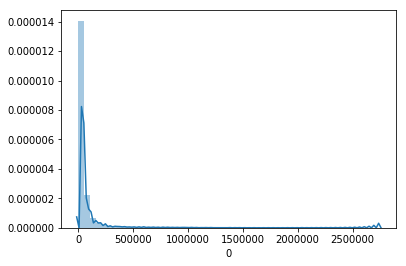

In [29]:
sns.distplot(df3['0'])

# Cat plot

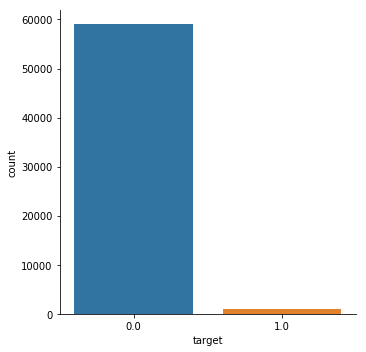

In [83]:
sns.catplot('target',data=df3,kind='count')

- The positive class (1) consists of component failures for a specific component of the MAF system.
- The negative class (0) consists of motors with failures for components not related to the MAF.

# Box plot

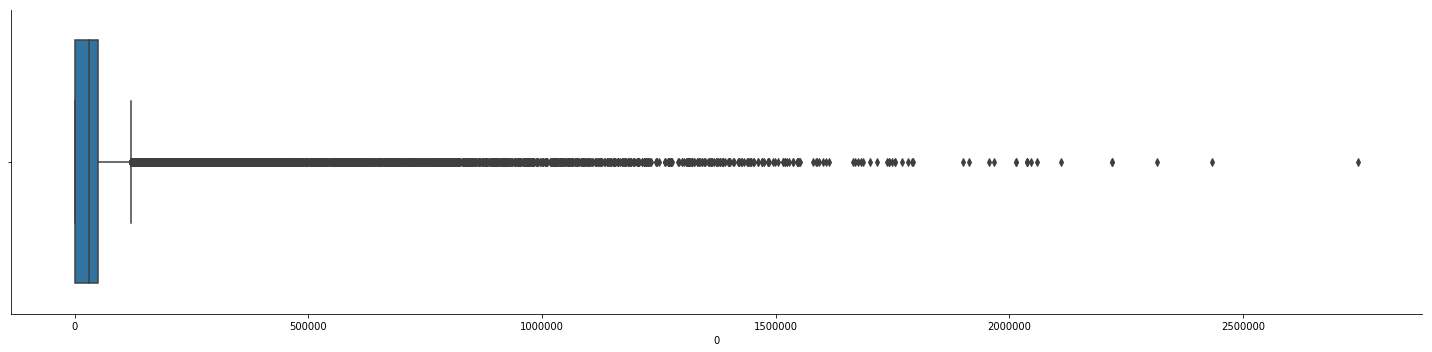

In [30]:
sns.catplot(x='0',data=df3,kind='box',aspect=4)

# Bivaraint Analysis

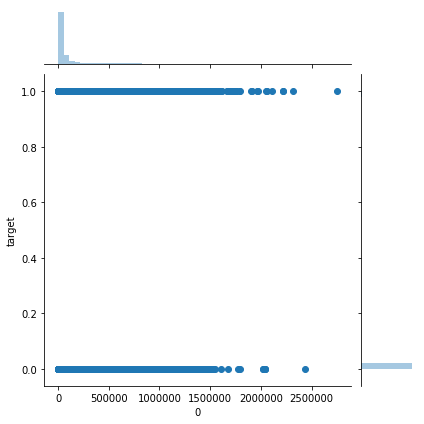

In [31]:
sns.jointplot(x='0',y='target',data=df3,kind='scatter')

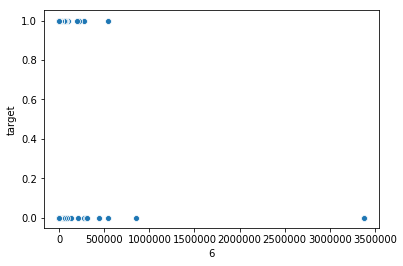

In [32]:
sns.scatterplot(x='6',y='target',data=df3)

# Checking Multi Collinearity

In [33]:
corr=df3.corr()
corr

,0,2,3,4,5,6,7,8,9,10,...,161,162,163,164,165,166,167,168,169,target
0,1.000000,-0.020777,-0.001110,0.046259,0.066789,0.018541,0.142624,0.284759,0.493699,0.605430,...,0.736337,0.715019,0.724412,0.724157,0.603875,0.469873,0.247075,0.014128,0.026386,0.536978
2,-0.020777,1.000000,-0.002285,-0.004944,-0.010270,0.017524,-0.000671,-0.008976,-0.023478,-0.033157,...,-0.005859,-0.007236,-0.006898,-0.014152,-0.019008,0.011781,0.019416,-0.006165,0.014228,-0.026894
3,-0.001110,-0.002285,1.000000,-0.000209,-0.000257,-0.000047,-0.000055,-0.000119,-0.000276,-0.000468,...,-0.001057,-0.001046,-0.000848,-0.000862,-0.000518,-0.000932,-0.000578,-0.000095,-0.000114,-0.000248
4,0.046259,-0.004944,-0.000209,1.000000,0.823108,-0.000428,-0.000589,0.003214,0.024237,0.048918,...,0.019364,0.013754,0.028607,0.063056,0.037821,-0.008457,-0.006774,0.070835,0.041685,0.007222
5,0.066789,-0.010270,-0.000257,0.823108,1.000000,-0.000532,-0.000719,0.006679,0.037134,0.073818,...,0.036766,0.024442,0.047917,0.097065,0.050743,-0.010884,-0.008442,0.106271,0.060705,0.018339
6,0.018541,0.017524,-0.000047,-0.000428,-0.000532,1.000000,0.165376,0.090570,0.032054,0.014211,...,0.033418,0.033600,0.022740,0.011185,0.000307,-0.000823,-0.001230,-0.000072,0.000244,0.012342
7,0.142624,-0.000671,-0.000055,-0.000589,-0.000719,0.165376,1.000000,0.788352,0.421545,0.210552,...,0.108123,0.136221,0.233684,0.198534,0.044161,0.004875,-0.004307,0.002032,0.007732,0.191058
8,0.284759,-0.008976,-0.000119,0.003214,0.006679,0.090570,0.788352,1.000000,0.750132,0.502691,...,0.255750,0.284714,0.433026,0.384818,0.182666,0.009449,-0.009481,0.007393,0.021394,0.339908
9,0.493699,-0.023478,-0.000276,0.024237,0.037134,0.032054,0.421545,0.750132,1.000000,0.873726,...,0.444402,0.459987,0.612096,0.619685,0.505081,0.021131,-0.019292,0.013960,0.016440,0.432974
10,0.605430,-0.033157,-0.000468,0.048918,0.073818,0.014211,0.210552,0.502691,0.873726,1.000000,...,0.534308,0.521645,0.595085,0.685920,0.736772,0.056358,-0.017556,0.015322,0.017048,0.371520


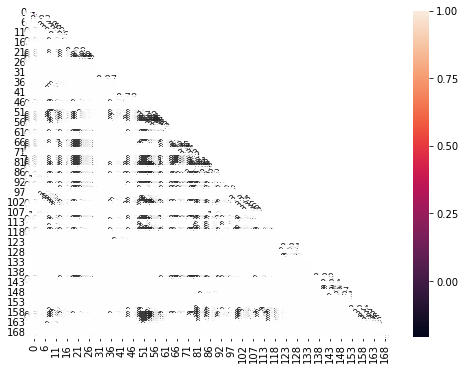

In [34]:
plt.figure(figsize=(8,6))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,fmt='0.2f',mask=mask)

In [35]:
x=df3.iloc[:,:-1]
y=df3.iloc[:,-1]

In [36]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [37]:
len(x.keys())

162

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif=pd.DataFrame()
vif['Feature']=x.keys()
vif['VIF Score'] = [variance_inflation_factor(x.values,i) for i in range(162)]

In [40]:
vif

,Feature,VIF Score
0,0,4.694306e+02
1,2,1.472015e+00
2,3,1.264815e+09
3,4,3.178368e+00
4,5,3.345482e+00
5,6,5.365920e+00
6,7,1.705658e+01
7,8,2.413826e+02
8,9,6.048138e+03
9,10,5.964945e+04


# Checking balance or inbalance in dataset

In [41]:
y.value_counts()

0.0    59000
1.0     1000
Name: target, dtype: int64

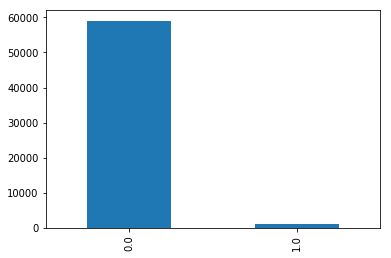

In [42]:
y.value_counts().plot('bar')

# from above chart it is inbalanced

# Applying smote for balancing dataset

In [43]:
import imblearn
from imblearn.over_sampling import SMOTE

In [44]:
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(x,y)

<bound method IndexOpsMixin.value_counts of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
117970    1.0
117971    1.0
117972    1.0
117973    1.0
117974    1.0
117975    1.0
117976    1.0
117977    1.0
117978    1.0
117979    1.0
117980    1.0
117981    1.0
117982    1.0
117983    1.0
117984    1.0
117985    1.0
117986    1.0
117987    1.0
117988    1.0
117989    1.0
117990    1.0
117991    1.0
117992    1.0
117993    1.0
117994    1.0
117995    1.0
117996    1.0
117997    1.0
117998    1.0
117999    1.0
Length: 118000, dtype: float64>

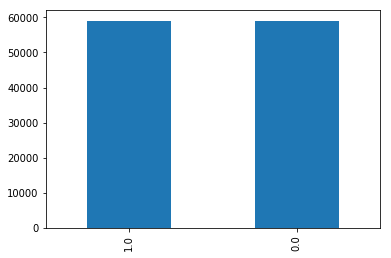

In [45]:
pd.Series(y_resample).value_counts().plot('bar')
pd.Series(y_resample).value_counts

# Splitting Data into Training and Testing

In [46]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((82600, 162), (35400, 162), (82600,), (35400,))

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model_1=LogisticRegression()

# Apply Model

In [49]:
model_1.fit(x_train,y_train)

C:\Users\Gopidi Harish Reddy\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gopidi Harish Reddy\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluation

In [50]:
y_pred=model_1.predict(x_test)
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [51]:
y_pred_prob=model_1.predict_proba(x_test)[:,1]
y_pred_prob

array([0.0636988 , 0.99999209, 0.99753447, ..., 0.06997854, 0.06355152,
       0.12469451])

In [52]:
import innomatics

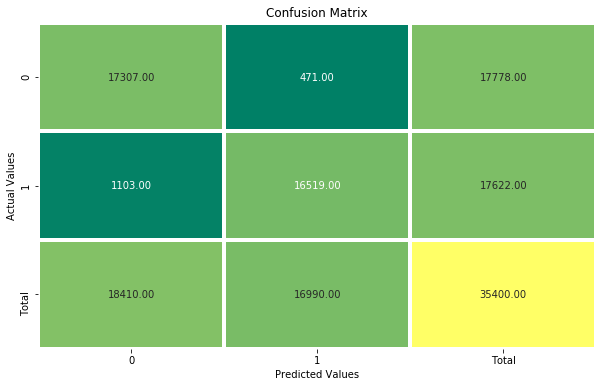

******************************Classifcation Report******************************


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     17778
         1.0       0.97      0.94      0.95     17622

    accuracy                           0.96     35400
   macro avg       0.96      0.96      0.96     35400
weighted avg       0.96      0.96      0.96     35400


************************************Kappa Score************************************


Kappa Score = 0.9110577240791583

******************************Area Under Curve Score******************************


AUC Score = 0.9554571834450639
Number of probabilities to build ROC = 2498


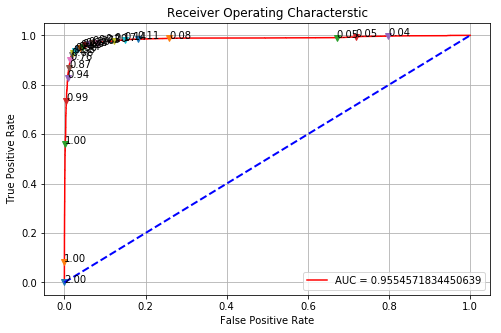

In [53]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['0','1'],n=100,verbose=True)

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_rf=RandomForestClassifier(n_estimators=20,criterion='gini',max_features=0.2)

In [56]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_pred=model_rf.predict(x_test)
y_pred_prob=model_rf.predict_proba(x_test)[:,1]
y_pred_prob


array([0., 1., 1., ..., 0., 0., 0.])

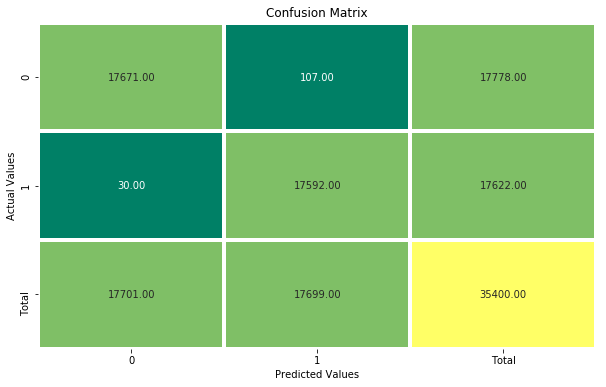

******************************Classifcation Report******************************


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     17778
         1.0       0.99      1.00      1.00     17622

    accuracy                           1.00     35400
   macro avg       1.00      1.00      1.00     35400
weighted avg       1.00      1.00      1.00     35400


************************************Kappa Score************************************


Kappa Score = 0.9922598850785886

******************************Area Under Curve Score******************************


AUC Score = 0.9961394539003402
Number of probabilities to build ROC = 22


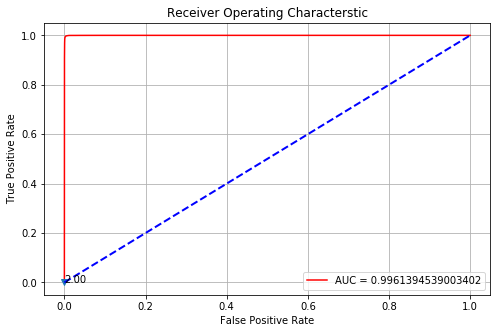

In [58]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['0','1'],n=100,verbose=True)

# Using Test Data predicting the Target variable

In [59]:
df_4=pd.read_csv('maf_test.csv')

In [60]:
df_4

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,160,161,162,163,164,165,166,167,168,169
0,0,21992,na,0,na,0,0,0,0,0,...,272368,92340,145288,131818,86808,62154,96058,3252,0,0
1,1,21384,na,na,na,na,na,0,0,0,...,68412,30306,70896,80616,133222,514760,9098,0,na,na
2,2,2300,na,620,560,0,0,0,0,0,...,14516,9308,27072,54904,2942,112,0,0,0,0
3,3,40588,na,2130706432,164,0,0,0,0,0,...,411056,218562,449834,344838,231628,119826,101478,2344,0,0
4,4,5268,na,420,340,0,0,0,0,0,...,13656,4000,9050,50890,754,22,2,0,0,0
5,5,80888,na,na,na,na,na,0,0,0,...,1019536,469908,897618,359200,15692,3320,1312,0,na,na
6,6,77566,na,410,382,0,0,0,0,0,...,385764,180406,417108,562244,905248,677004,208992,106,0,0
7,7,120456,0,940,na,0,0,0,0,29936,...,1022062,314814,545820,729216,703272,1805324,3986,0,0,0
8,8,65184,na,422,366,0,0,0,0,0,...,314274,182160,361612,320308,573642,565840,464796,17618,0,0
9,9,628,na,20,16,0,0,0,0,0,...,1390,550,1456,2740,2714,16906,2,0,0,0


In [61]:
df_4.replace('na',np.NaN,inplace=True)

In [62]:
df_4.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,160,161,162,163,164,165,166,167,168,169
0,0,21992,NaN,0,NaN,0,0,0,0,0,...,272368,92340,145288,131818,86808,62154,96058,3252,0,0
1,1,21384,NaN,NaN,NaN,NaN,NaN,0,0,0,...,68412,30306,70896,80616,133222,514760,9098,0,NaN,NaN
2,2,2300,NaN,620,560,0,0,0,0,0,...,14516,9308,27072,54904,2942,112,0,0,0,0
3,3,40588,NaN,2130706432,164,0,0,0,0,0,...,411056,218562,449834,344838,231628,119826,101478,2344,0,0
4,4,5268,NaN,420,340,0,0,0,0,0,...,13656,4000,9050,50890,754,22,2,0,0,0


In [63]:
df_4.isnull().sum()/len(df_4)

Unnamed: 0    0.000000
0             0.000000
1             0.772687
2             0.057875
3             0.248812
4             0.043125
5             0.043125
6             0.011813
7             0.011813
8             0.011813
9             0.011813
10            0.011813
11            0.011813
12            0.011813
13            0.011813
14            0.011813
15            0.011813
16            0.010937
17            0.010188
18            0.010188
19            0.074875
20            0.010563
21            0.010188
22            0.010563
23            0.010125
24            0.010563
25            0.010125
26            0.047750
27            0.010188
28            0.010188
                ...   
140           0.068375
141           0.068375
142           0.011875
143           0.047750
144           0.047750
145           0.047750
146           0.047750
147           0.047750
148           0.047750
149           0.047750
150           0.047750
151           0.047750
152        

In [64]:
16000*0.31 # if more than or equal to 18600 NAN values are there in that column then drop that column

4960.0

In [65]:
df5=df_4.copy()

In [66]:
df5.dropna(axis=1,thresh=4960,inplace=True)

In [67]:
df5.shape

(16000, 164)

In [68]:
from sklearn.impute import SimpleImputer

In [69]:
impute_mean = SimpleImputer(missing_values = np.nan , strategy='mean',copy=True,verbose=2)
df6 = pd.DataFrame(impute_mean.fit_transform(df5),columns=df5.columns)

In [70]:
df6.drop(['Unnamed: 0'],axis=1,inplace=True)

In [71]:
df7 = df6.loc[:,df6.apply(pd.Series.nunique) != 1]

In [72]:
df7.head()

,0,2,3,4,5,6,7,8,9,10,...,160,161,162,163,164,165,166,167,168,169
0,21992.0,0.000000e+00,439.498794,0.000000,0.00000,0.0,0.0,0.0,0.0,5140.0,...,272368.0,92340.0,145288.0,131818.0,86808.0,62154.0,96058.0,3252.0,0.000000,0.000000
1,21384.0,3.580393e+08,439.498794,6.428347,10.19595,0.0,0.0,0.0,72938.0,895660.0,...,68412.0,30306.0,70896.0,80616.0,133222.0,514760.0,9098.0,0.0,0.064969,0.242683
2,2300.0,6.200000e+02,560.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,242.0,...,14516.0,9308.0,27072.0,54904.0,2942.0,112.0,0.0,0.0,0.000000,0.000000
3,40588.0,2.130706e+09,164.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,620.0,...,411056.0,218562.0,449834.0,344838.0,231628.0,119826.0,101478.0,2344.0,0.000000,0.000000
4,5268.0,4.200000e+02,340.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,242.0,...,13656.0,4000.0,9050.0,50890.0,754.0,22.0,2.0,0.0,0.000000,0.000000


In [73]:
x_1 = df7.iloc[:,0:]

In [74]:
y_pred = model_rf.predict(x_1)

In [75]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
predict = pd.DataFrame()
predict

""


# Predicting the target variable

In [77]:
predict['target'] = y_pred

In [78]:
predict['target']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
15970    0.0
15971    0.0
15972    0.0
15973    0.0
15974    0.0
15975    0.0
15976    0.0
15977    0.0
15978    0.0
15979    0.0
15980    0.0
15981    0.0
15982    0.0
15983    0.0
15984    0.0
15985    0.0
15986    0.0
15987    0.0
15988    0.0
15989    0.0
15990    0.0
15991    0.0
15992    0.0
15993    0.0
15994    0.0
15995    0.0
15996    0.0
15997    0.0
15998    0.0
15999    0.0
Name: target, Length: 16000, dtype: float64

In [79]:
predict

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [80]:
predict['target'].value_counts()

0.0    15524
1.0      476
Name: target, dtype: int64

In [81]:
predict.to_csv('motor failure.csv',index=False)